In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
import time
from posydon.visualization.plot2D import plot2D
from posydon.grids.psygrid import PSyGrid

import scienceplots
# plt.style.use('science')
plt.style.use(['science','ieee','no-latex'])

usetex mode requires TeX.


In [2]:
data_dir = "/blue/jeffrey.andrews/POSYDON/data/POSYDON_data/CO-HMS_RLO/"
grid = PSyGrid(data_dir + 'grid_0.0142.h5')
print(grid.final_values.dtype.names)

('model_number', 'age', 'star_1_mass', 'star_2_mass', 'period_days', 'binary_separation', 'lg_system_mdot_1', 'lg_system_mdot_2', 'lg_wind_mdot_1', 'lg_wind_mdot_2', 'lg_mstar_dot_1', 'lg_mstar_dot_2', 'lg_mtransfer_rate', 'xfer_fraction', 'rl_relative_overflow_1', 'rl_relative_overflow_2', 'trap_radius', 'acc_radius', 't_sync_rad_1', 't_sync_conv_1', 't_sync_rad_2', 't_sync_conv_2', 'S1_he_core_mass', 'S1_c_core_mass', 'S1_o_core_mass', 'S1_he_core_radius', 'S1_c_core_radius', 'S1_o_core_radius', 'S1_center_h1', 'S1_center_he4', 'S1_center_c12', 'S1_center_n14', 'S1_center_o16', 'S1_surface_h1', 'S1_surface_he4', 'S1_surface_c12', 'S1_surface_n14', 'S1_surface_o16', 'S1_c12_c12', 'S1_center_gamma', 'S1_avg_c_in_c_core', 'S1_surf_avg_omega', 'S1_surf_avg_omega_div_omega_crit', 'S1_log_LH', 'S1_log_LHe', 'S1_log_LZ', 'S1_log_Lnuc', 'S1_log_Teff', 'S1_log_L', 'S1_log_R', 'S1_log_center_T', 'S1_log_center_Rho', 'S1_total_moment_of_inertia', 'S1_spin_parameter', 'S1_log_total_angular_momen

In [3]:
# Pass values by looking at the concerned 
# point in the CO-HMS_RLO grid 

# Will form DNS
Porb_1 = 10**3.1
M2_1 = 1.25
M1_1 = 10**0.88

# Won't form DNS
Porb_2 = 10**2.9
M2_2 = 1.25
M1_2 = 10**0.91

def calculate_idx(Porb, M2, M1):
    
    delta_log_Porb = 3*np.abs(np.log10(Porb) - np.log10(grid.initial_values['period_days']))
    delta_M1 = np.abs(M1 - grid.initial_values['star_1_mass'])
    delta_M2 = np.abs(M2 - grid.initial_values['star_2_mass'])

    dist = np.sqrt(delta_log_Porb**2 + delta_M1**2 + delta_M2**2)

    idx = np.nanargmin(dist)
    
    return(idx)

idx_1 = calculate_idx(Porb_1, M2_1, M1_1)
idx_2 = calculate_idx(Porb_2, M2_2, M1_2)

profile_1 = grid[idx_1].final_profile1
history_1 = grid[idx_1].binary_history

profile_2 = grid[idx_2].final_profile1
history_2 = grid[idx_2].binary_history

print(profile_1.dtype.names)
print(history_1.dtype.names)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


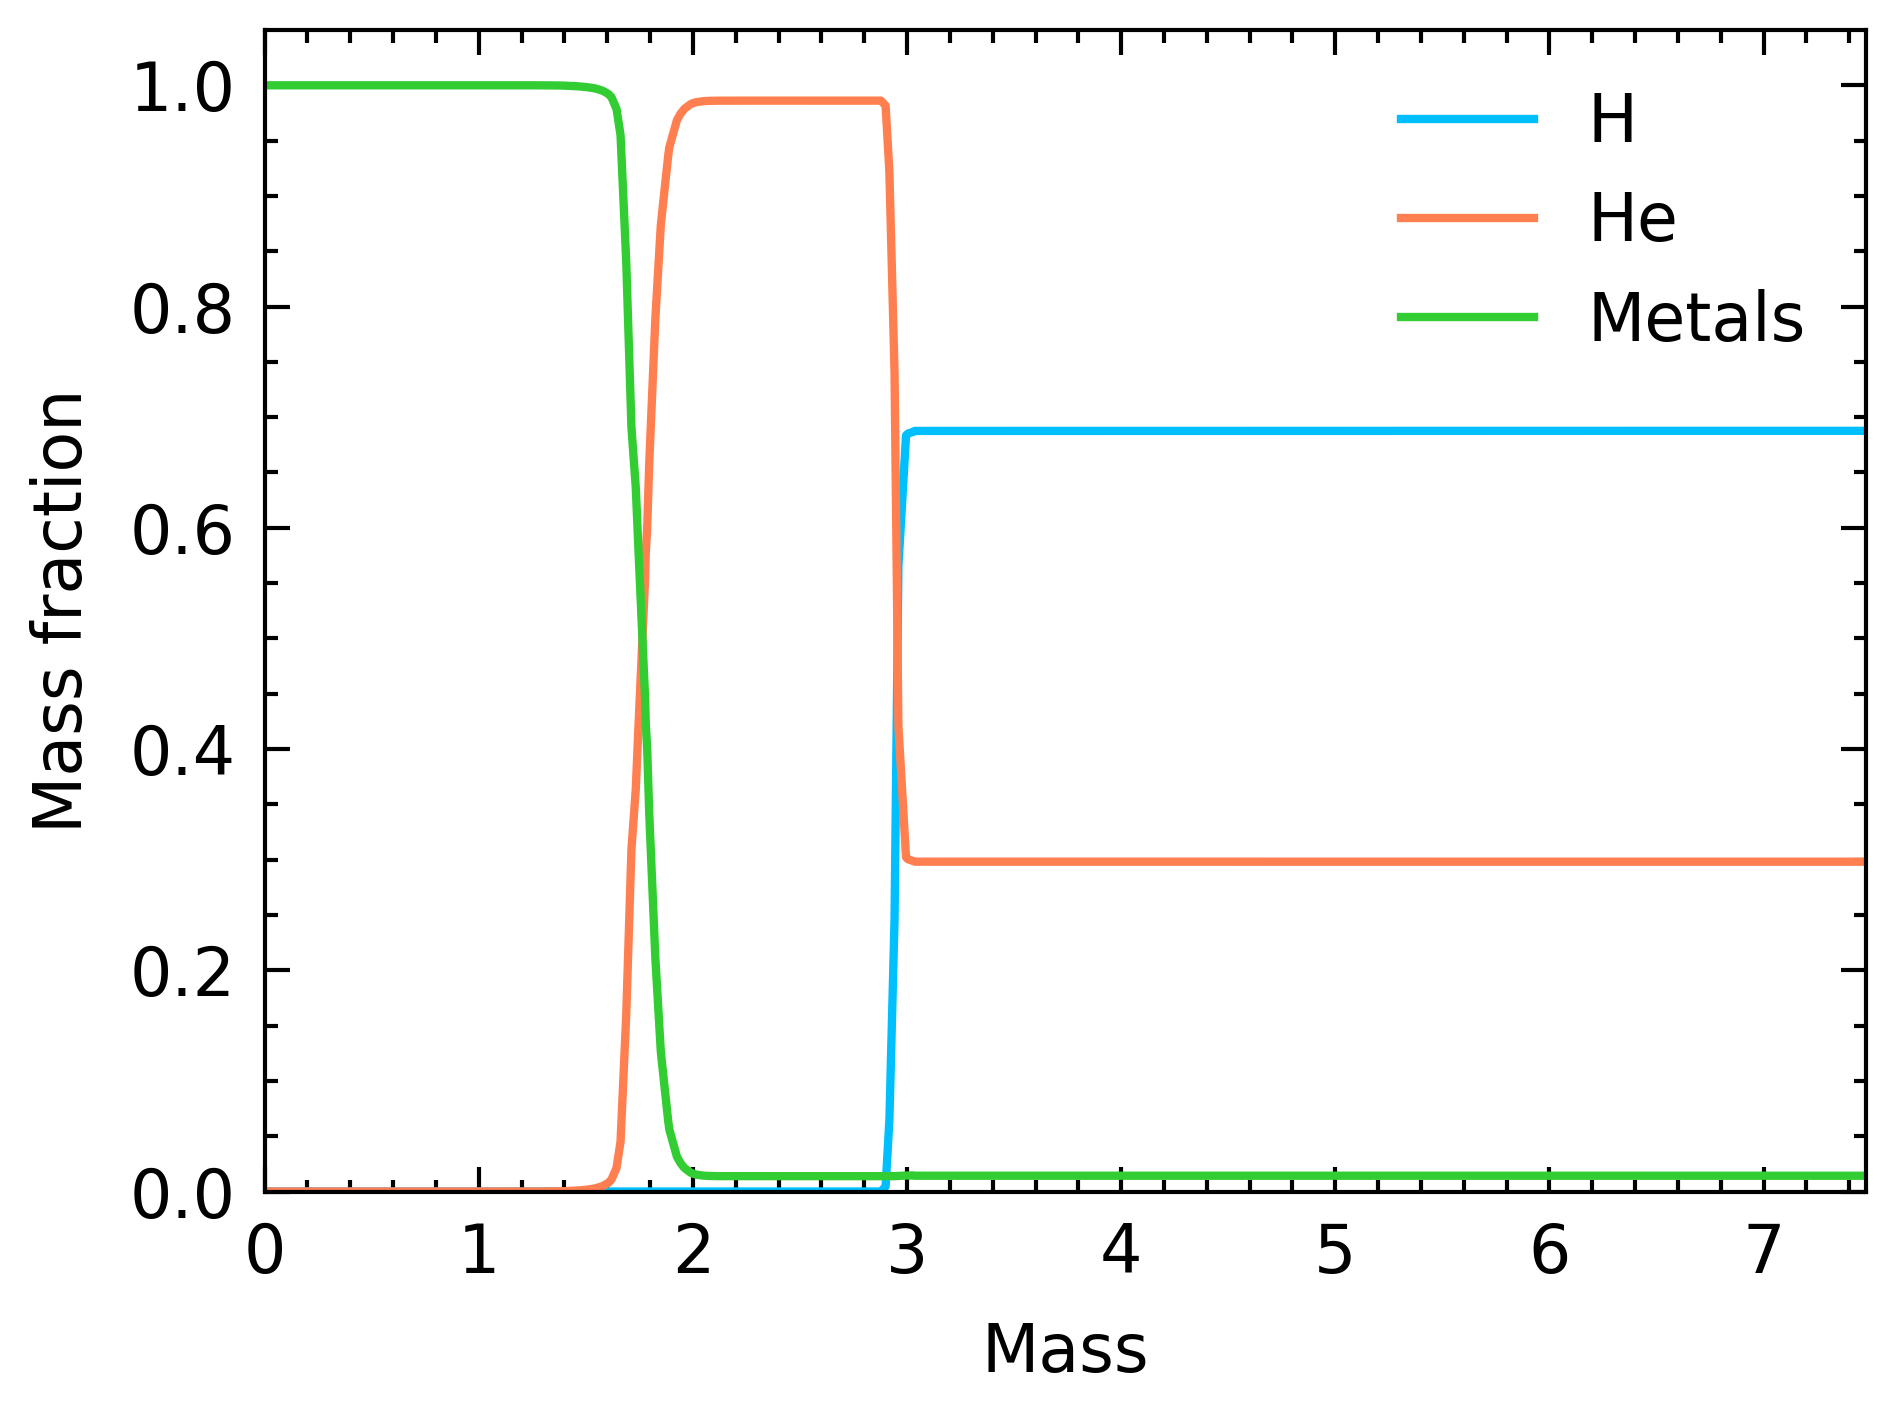

In [4]:
plt.plot(profile_1['mass'], profile_1['x_mass_fraction_H'], c='deepskyblue', ls='-', label='H')
plt.plot(profile_1['mass'], profile_1['y_mass_fraction_He'], c='coral', ls='-', label='He')
plt.plot(profile_1['mass'], profile_1['z_mass_fraction_metals'], c='limegreen', ls='-', label='Metals')

plt.xlim(0, np.max(profile_1['mass']))
plt.ylim(0, 1.05)

plt.xlabel('Mass')
plt.ylabel('Mass fraction')

plt.legend()

plt.tight_layout()

# plt.show()

# plt.savefig("Plots/f2f_Default_AGB.png",dpi=300,bbox_inches='tight')